In [226]:
import dgl
import numpy as np
import torch
import networkx as nx
import random
import math
import time

In [192]:
# attempt 3: generate a cyclic graph and randomize the rest of the edges (n-node, n-edges, + extra edges for randomness)

def genRandomGraphX2(num_nodes, num_edges):
    num_nodes -= 1 # the graph is zero-indexed but the total number at the end isn't?!
    G = nx.cycle_graph(num_nodes)
    
    # random edges:
    edges_added = 0
    while edges_added < num_edges-num_nodes:
        u,v = random.randint(0,num_nodes), random.randint(0,num_nodes)
        if u != v:
            if not G.has_edge(u,v):
                G.add_edge(u,v)
                edges_added += 1
    
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=[[.7, .7, .7]])
    print("edges:"G.edges()
    return G

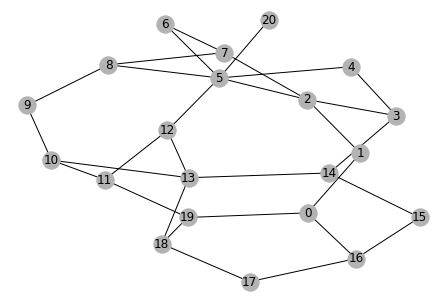

In [294]:
G = genRandomGraphX2(20,30)

In [246]:
def efficiencyMetric(G):
    num_nodes = len(G.nodes())
    floyd = nx.floyd_warshall_numpy(G)
    tri_floyd = np.triu(floyd, k=1)
    num_terms = ((num_nodes**2)-num_nodes)/2
    _mean = np.sum(tri_floyd)/num_terms
    assert _mean != np.inf
    return _mean

In [265]:
efficiencyMetric(G)

2.5105263157894737

In [292]:
def evaluateGraph(G):
    uv_dict = dict()
    num_nodes = G.number_of_nodes()
    for u in range(num_nodes):
        for v in range(num_nodes):
            if not G.has_edge(u,v) and u != v:
                # ignore the opposite route (since its undirected)
                if not (v,u) in uv_dict:
                    G.add_edge(u,v)
                    # calculate effiency right here:
                    score = efficiencyMetric(G)
                    uv_dict[(u,v)] = score
                    G.remove_edge(u,v)
    sorted_uv = sorted(uv_dict.items(), key=lambda item: item[1], reverse=True)
    top20 = sorted_uv[:20]
    return top20

In [295]:
top20_edges = evaluateGraph(G)

for edge in top20_edges:
    print("(%i -> %i) - Score: %0.5f"%(edge[0][0], edge[0][1], edge[1]))

(4 -> 7) - Score: 2.76190
(6 -> 20) - Score: 2.76190
(7 -> 20) - Score: 2.76190
(9 -> 12) - Score: 2.76190
(11 -> 18) - Score: 2.76190
(17 -> 19) - Score: 2.76190
(6 -> 8) - Score: 2.75714
(0 -> 17) - Score: 2.75238
(2 -> 4) - Score: 2.75238
(4 -> 20) - Score: 2.75238
(6 -> 9) - Score: 2.75238
(8 -> 20) - Score: 2.75238
(9 -> 20) - Score: 2.75238
(11 -> 13) - Score: 2.75238
(15 -> 18) - Score: 2.75238
(0 -> 15) - Score: 2.74762
(3 -> 12) - Score: 2.74762
(4 -> 6) - Score: 2.74762
(13 -> 19) - Score: 2.74762
(15 -> 17) - Score: 2.74762
